<a href="https://colab.research.google.com/github/43Ishu/Bike-sharing-Demand-Prediction-Capstone-project-2/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# importing liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing dataset
dataset=pd.read_csv("/content/drive/MyDrive/Bike Sharing Demand Prediction-Ishwarya/SeoulBikeData.csv",encoding = 'latin')

In [ ]:
#looking first 5 rows 
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# looking last 5 rows
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


**Understanding of DATA**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
dataset.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [ ]:
dataset.describe(include="all")

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
dataset.shape

(8760, 14)

In [ ]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [ ]:
# checking null values existed or not
dataset.isnull()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:

dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# for better visual need to rename  columns'
dataset.rename(columns={'Rented Bike Count':"Rented_bikes",'Temperature(°C)':"Temp_C","Humidity(%)":"Humidity",'Wind speed (m/s)':'Wind_Speed','Visibility (10m)':"Visibility",'Dew point temperature(°C)':"Dew_point_Temp",'Solar Radiation (MJ/m2)':"Solar_Radiation",'Rainfall(mm)':"Rainfall",'Snowfall (cm)':"Snow_fall"},inplace=True)

In [ ]:
dataset.head(1)

,Date,Rented_bikes,Hour,Temp_C,Humidity,Wind_Speed,Visibility,Dew_point_Temp,Solar_Radiation,Rainfall,Snow_fall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**EDA**

**DEPENDENT_VARIABLE**

**Rented_Bikes**

In [ ]:
dataset['Rented_bikes'].value_counts()

0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented_bikes, Length: 2166, dtype: int64

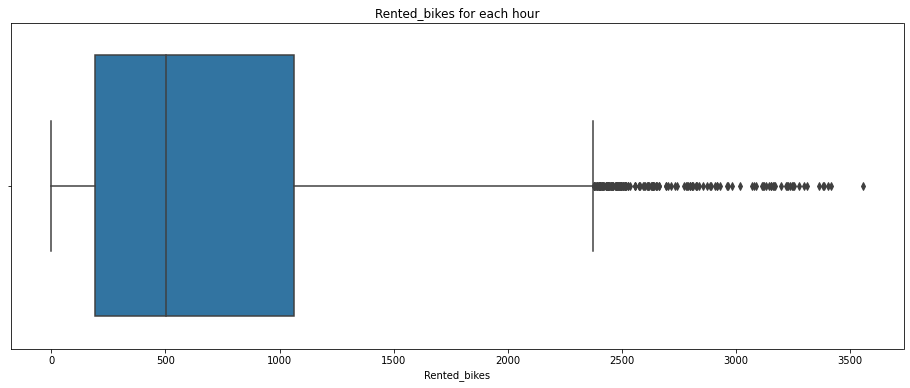

In [ ]:
plt.figure(figsize=(16,6))
sb.boxplot(dataset['Rented_bikes'])
plt.title("Rented_bikes for each hour")
plt.show()

In [ ]:
dataset['Rented_bikes'].max()

3556

In [ ]:
dataset['Rented_bikes'].min()

0

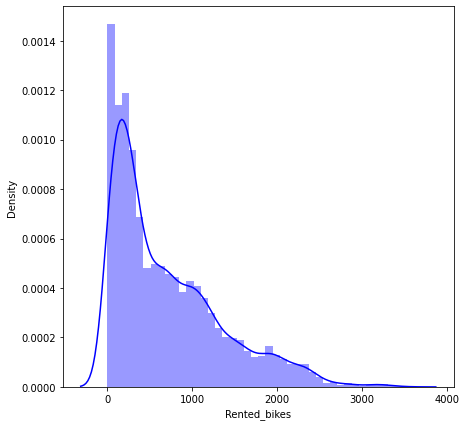

In [ ]:
# Dependent variable 'Rented_bikes'
plt.figure(figsize=(7,7))
sb.distplot(dataset['Rented_bikes'],color="b")
plt.show()

From the above data we can conclude that maximum rented bikes are 3556,minimum rented bikes are zero also existed

**Independent_Variable**

**Exploring numerical variables**

In [ ]:
numeric_features = dataset.describe().columns
numeric_features

Index(['Rented_bikes', 'Hour', 'Temp_C', 'Humidity', 'Wind_Speed',
       'Visibility', 'Dew_point_Temp', 'Solar_Radiation', 'Rainfall',
       'Snow_fall'],
      dtype='object')

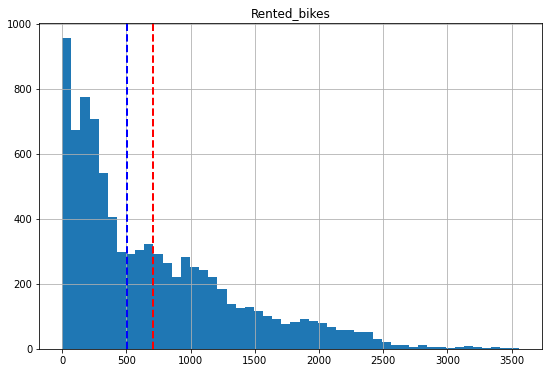

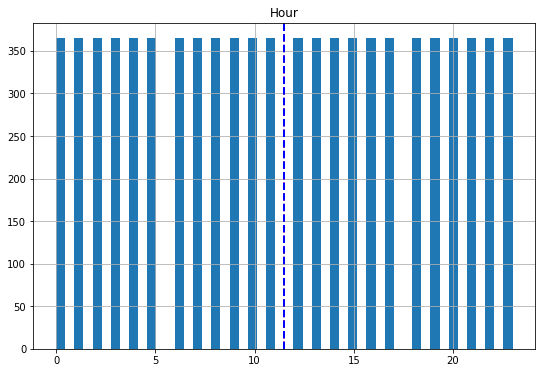

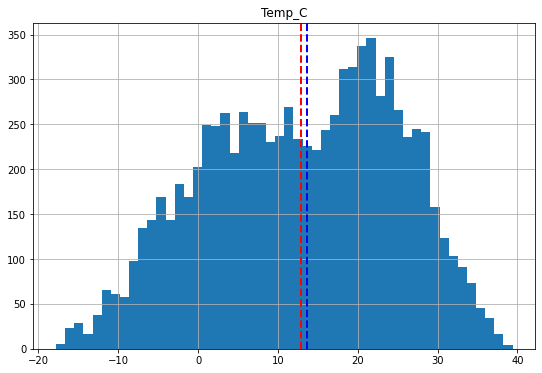

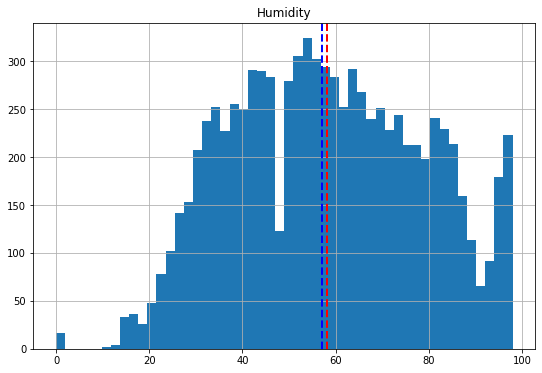

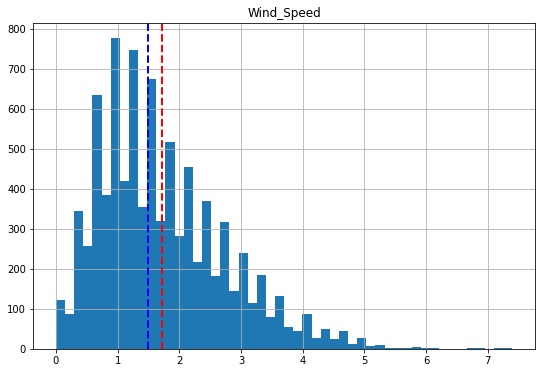

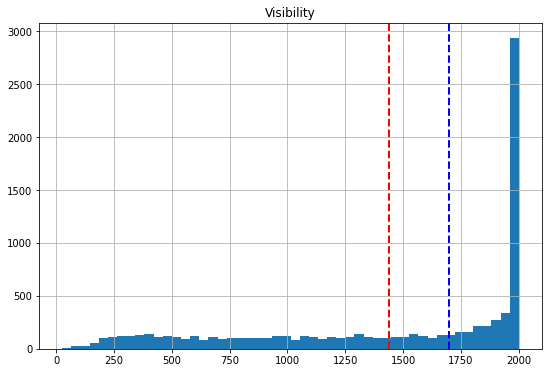

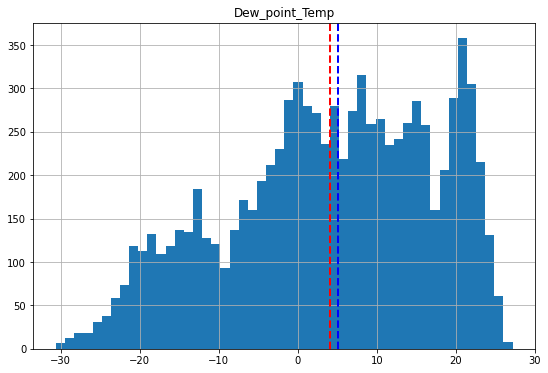

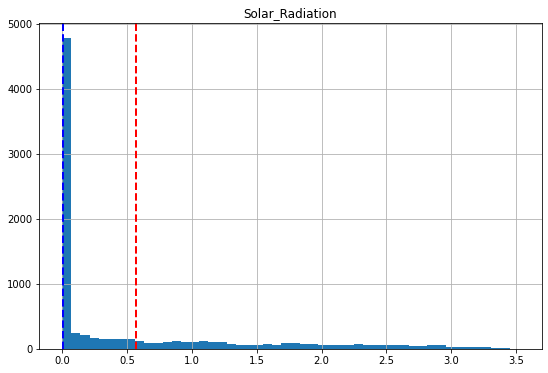

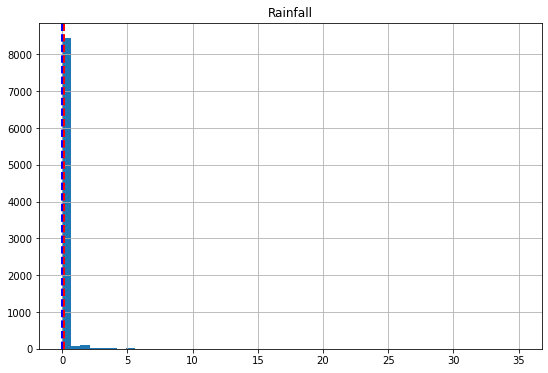

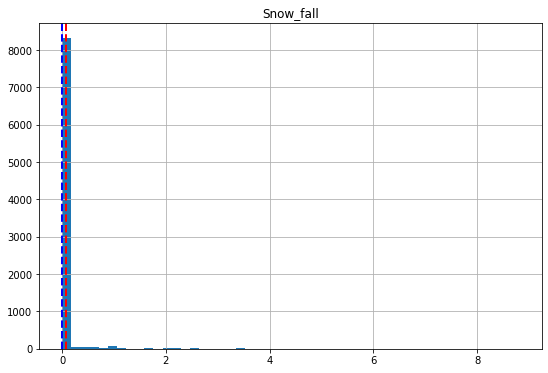

In [ ]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

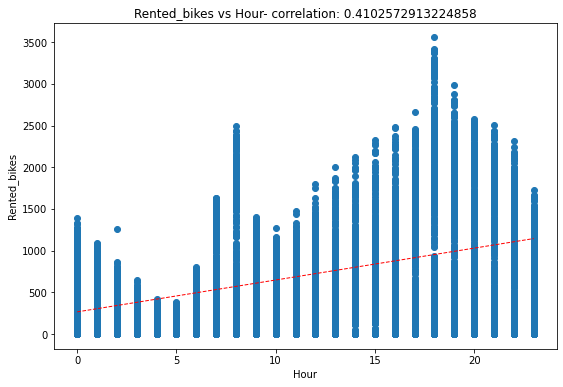

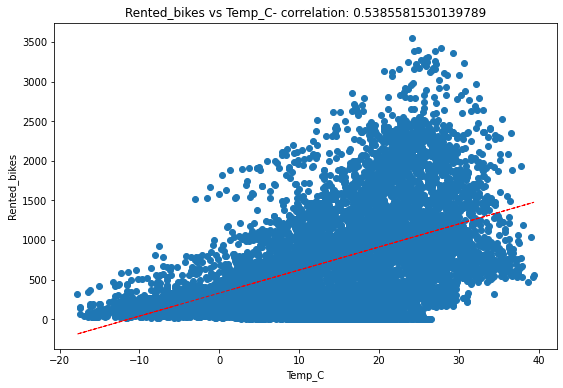

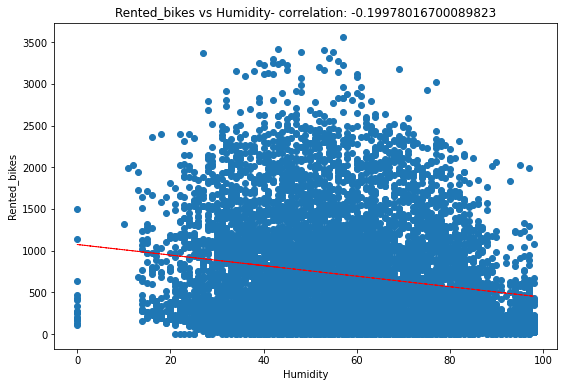

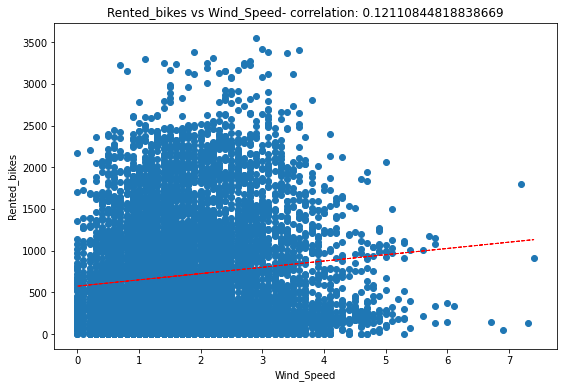

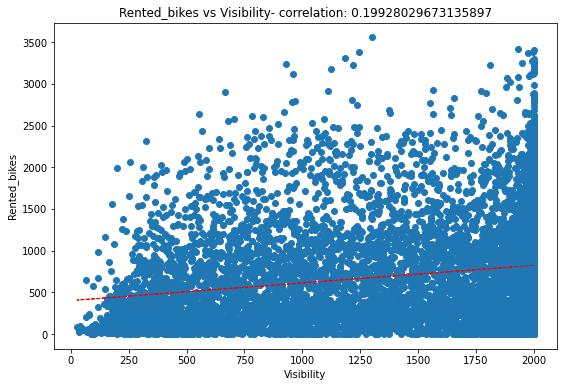

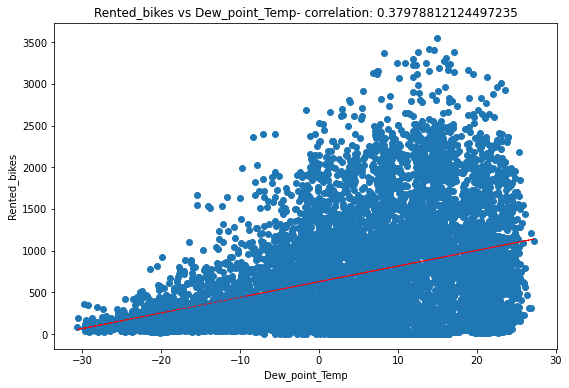

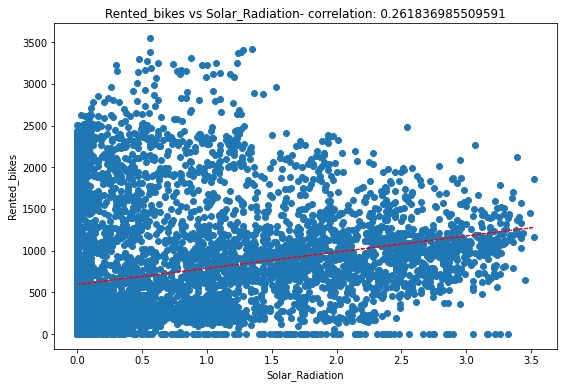

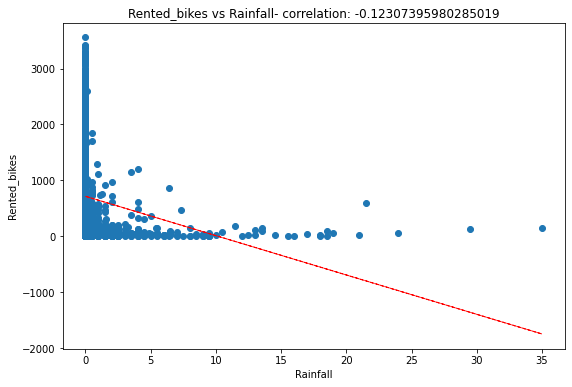

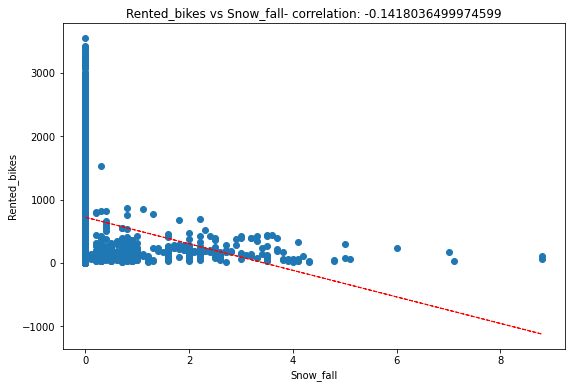

In [ ]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Rented_bikes']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented_bikes')
    ax.set_title('Rented_bikes vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Rented_bikes'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

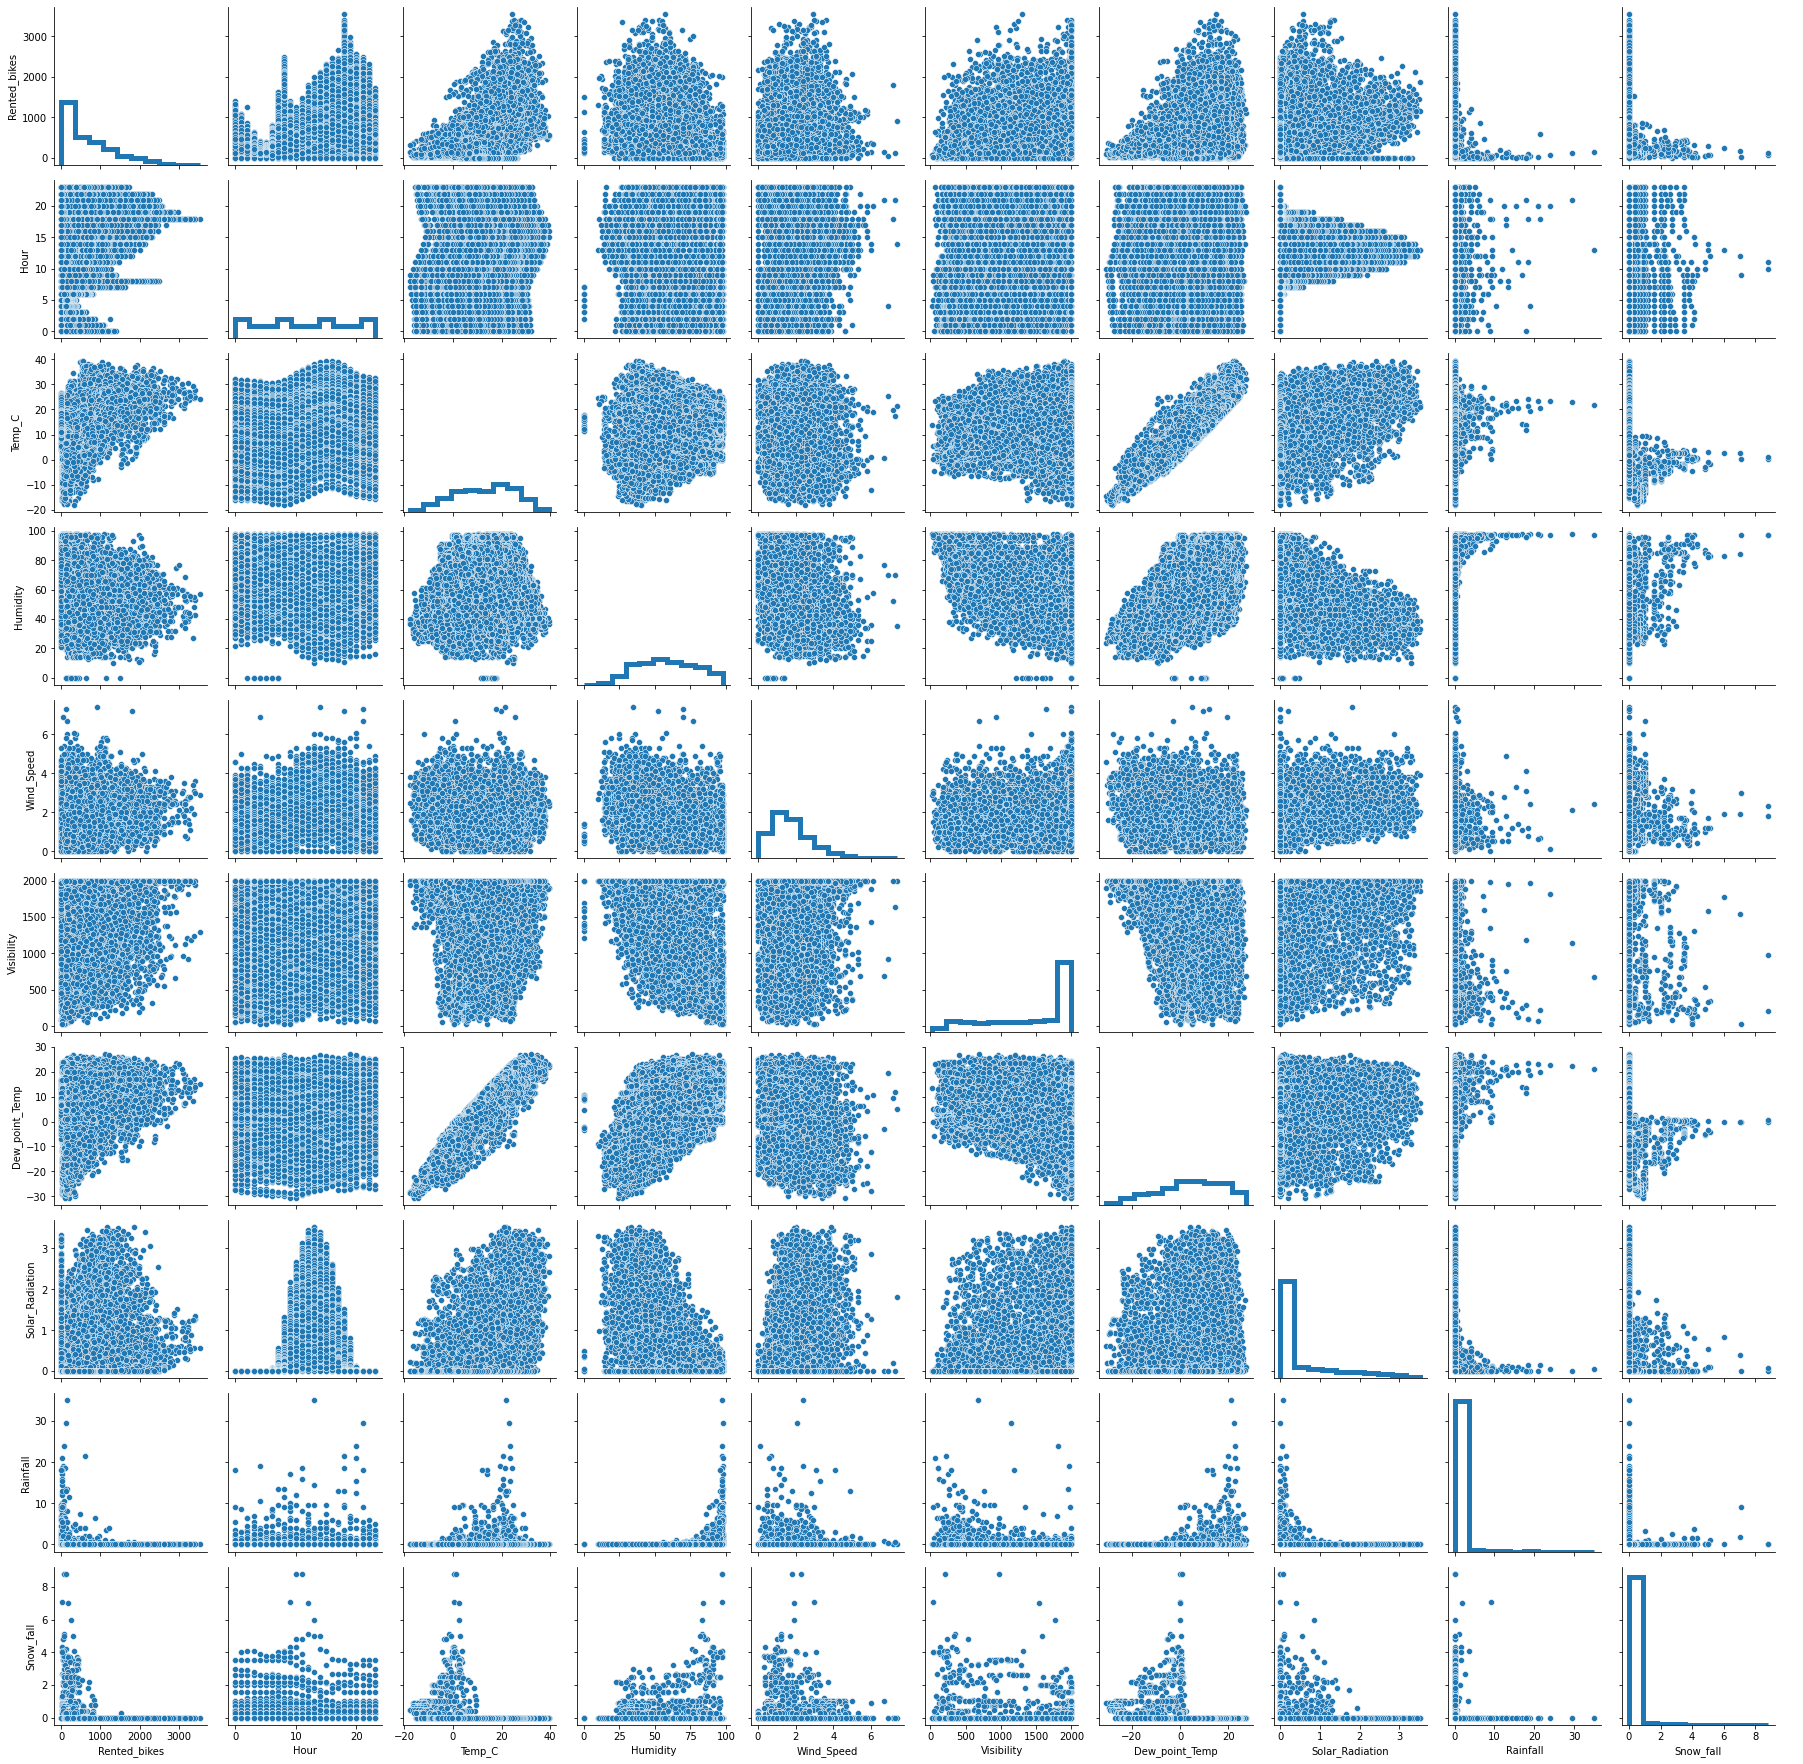

In [ ]:
g=sb.PairGrid(data=dataset  ,palette="bright")
g.map_upper(sb.scatterplot)
g.map_lower(sb.scatterplot)
g.map_diag(plt.hist, histtype="step",linewidth=5)
g.add_legend()
plt.show()

From the above data we  can conclude that relationship between each columns every columns its shows positive trend and negative trend



In [ ]:
dataset.head(1)

,Date,Rented_bikes,Hour,Temp_C,Humidity,Wind_Speed,Visibility,Dew_point_Temp,Solar_Radiation,Rainfall,Snow_fall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**Exploaring categorical DATA**

In [ ]:
categorical_features=["Seasons",	"Holiday",	"Functioning Day"]

In [ ]:
for col in categorical_features[:]:
    counts = dataset[col].value_counts()
    print(counts)

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
Yes    8465
No      295
Name: Functioning Day, dtype: int64


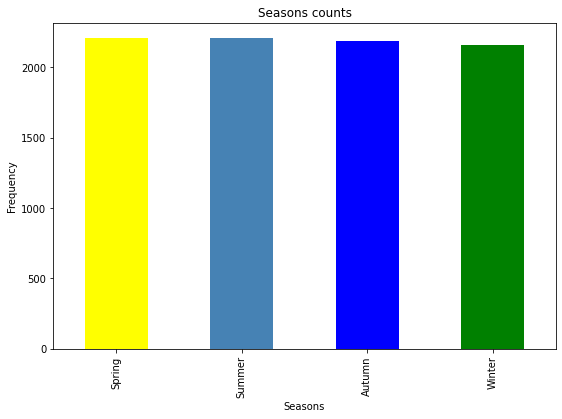

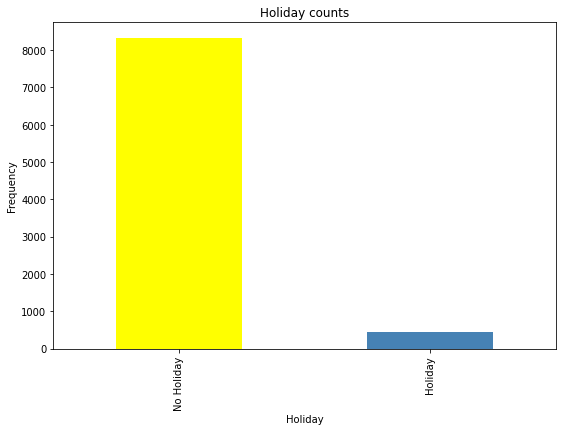

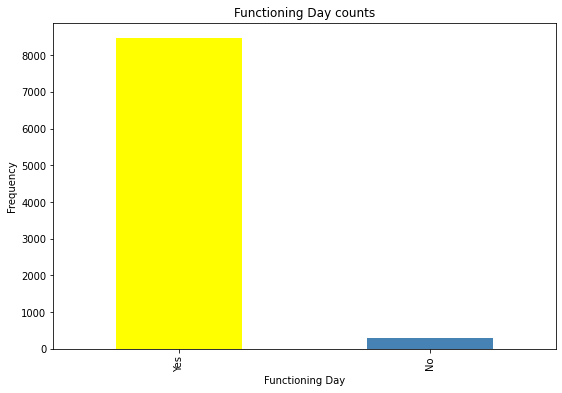

In [ ]:

for col in categorical_features[:]:
    counts = dataset[col].value_counts()#.sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color={'red',"blue","green","yellow",'steelblue',"black"})
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

From the above data we can conclude that

**SEASONS**

Summer    2208,

Spring    2208,

Autumn    2184,

Winter    2160 

**HOLIDAY/ NO HOLIDAY**

No Holiday    8328,

Holiday        432

**FUNCTIONAL DAY/ NON- FUNCTIONAL DAY**

Yes    8465,

No      295

**Rented_Bikes vs Hour**

In [ ]:
dataset[["Rented_bikes","Hour"]].groupby('Rented_bikes').count()

,Hour
Rented_bikes,
0,295
2,3
3,2
4,5
5,3
...,...
3380,1
3384,1
3404,1


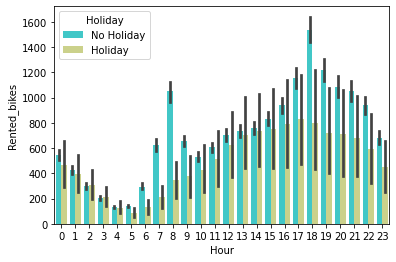

In [ ]:
sb.barplot(y='Rented_bikes',x="Hour",hue='Holiday',data=dataset,palette='rainbow')

From the above conclude that
Rented_bikes are  took in Non-Holidays maximum bikes taken is 3,556 in 1 hour and Bikes not took by any one in 295 hours

In [ ]:
dataset[["Rented_bikes","Temp_C"]].groupby('Rented_bikes').max()


,Temp_C
Rented_bikes,
0,26.5
2,17.0
3,4.7
4,16.3
5,16.7
...,...
3380,24.4
3384,27.0
3404,24.9


In [ ]:
dataset["Temp_C"].value_counts()

 19.1    40
 20.5    40
 23.4    39
 7.6     38
 20.7    38
         ..
-13.6     1
-12.9     1
-12.6     1
 37.6     1
 36.9     1
Name: Temp_C, Length: 546, dtype: int64

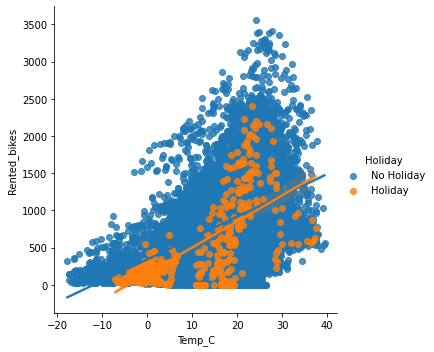

In [ ]:
sb.lmplot(y='Rented_bikes',x="Temp_C",data=dataset,hue="Holiday");           


From the above data we can conclude that 
most of the rented bikes worked when temperature above 20centigrades in Non-Holiday days

**Rented_bikes vs Humidity**

In [ ]:
dataset[["Rented_bikes","Humidity"]].groupby('Rented_bikes').max()

,Humidity
Rented_bikes,
0,96
2,97
3,94
4,96
5,97
...,...
3380,48
3384,55
3404,53


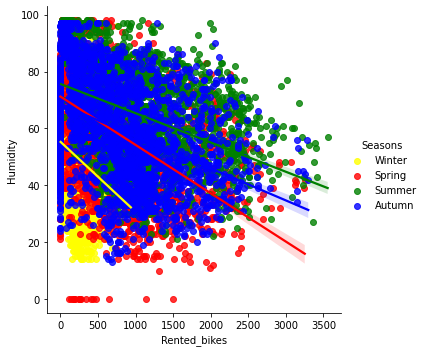

In [ ]:
sb.lmplot(x='Rented_bikes',y="Humidity",data=dataset,hue="Seasons",palette=dict(Summer="g",Spring="red",Autumn="b",Winter="yellow"));   

From the above data we can conclude that  
most of the rented bikes are taken when the Humidity is higher 20% ,all seasons have equal demand for Rental_bikes

**Rented_bikes vs Wind_Speed**

In [ ]:
dataset.groupby(["Rented_bikes","Wind_Speed"]).size() 

Rented_bikes  Wind_Speed
0             0.0           3
              0.1           1
              0.2           7
              0.3           9
              0.4           9
                           ..
3380          1.9           1
3384          3.1           1
3404          3.6           1
3418          3.0           1
3556          2.9           1
Length: 7810, dtype: int64

In [ ]:
dataset[["Rented_bikes","Wind_Speed"]].groupby('Rented_bikes').count()

,Wind_Speed
Rented_bikes,
0,295
2,3
3,2
4,5
5,3
...,...
3380,1
3384,1
3404,1


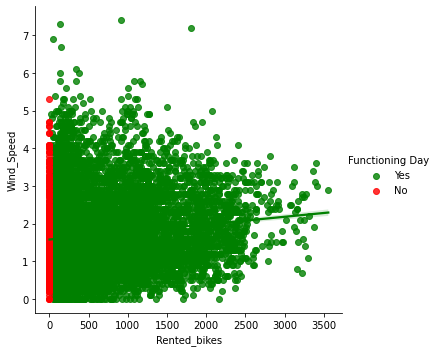

In [ ]:
sb.lmplot(x='Rented_bikes',y="Wind_Speed",data=dataset,hue="Functioning Day",palette=dict(Yes="g",No="red"));

From the above data we can conclude that 
 Irresptive of Wind_speed all working days customers were taking bikes for Rent

**Rented_bikes vs Rainfall**

In [ ]:
dataset.groupby(["Rented_bikes","Rainfall"]).size() 

Rented_bikes  Rainfall
0             0.0         283
              0.1           2
              0.5           2
              1.0           2
              1.5           1
                         ... 
3380          0.0           1
3384          0.0           1
3404          0.0           1
3418          0.0           1
3556          0.0           1
Length: 2643, dtype: int64

In [ ]:
dataset[["Rented_bikes","Rainfall"]].groupby('Rented_bikes').max()

,Rainfall
Rented_bikes,
0,18.0
2,6.0
3,6.4
4,9.5
5,9.5
...,...
3380,0.0
3384,0.0
3404,0.0


<Figure size 1440x432 with 0 Axes>

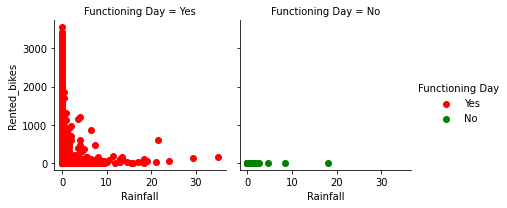

In [ ]:
plt.figure(figsize=(20, 6))
g=sb.FacetGrid(data=dataset,col="Functioning Day",col_order=['Yes','No'],hue="Functioning Day",palette=['red','green'])
g.map(plt.scatter,"Rainfall","Rented_bikes").add_legend()
plt.show();

From the above data we can conclude that 
In functional working day when ever Rainfall reaches 10mm then rented_bikes reducing and when Rainfall is high i.e more than 20mm renting bikes done rarely ev

**Rented_bikes vs Snow_fall**

In [ ]:
dataset[["Rented_bikes","Snow_fall"]].groupby('Rented_bikes').size()

Rented_bikes
0       295
2         3
3         2
4         5
5         3
       ... 
3380      1
3384      1
3404      1
3418      1
3556      1
Length: 2166, dtype: int64

In [ ]:
dataset.groupby(["Rented_bikes","Snow_fall"]).size() 

Rented_bikes  Snow_fall
0             0.0          295
2             0.0            3
3             0.0            2
4             0.0            5
5             0.0            3
                          ... 
3380          0.0            1
3384          0.0            1
3404          0.0            1
3418          0.0            1
3556          0.0            1
Length: 2590, dtype: int64

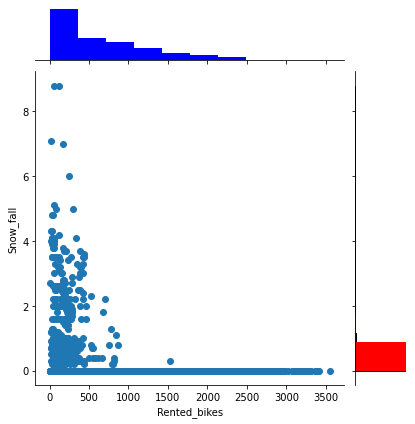

In [ ]:
g=sb.JointGrid(x="Rented_bikes",y="Snow_fall",data=dataset)
g=g.plot(plt.scatter,sb.histplot)
#g=g.plot_marginals(sns.displot,kde=False, color="b")
g.ax_marg_x.hist(dataset["Rented_bikes"],color="b",alpha=1)
g.ax_marg_y.hist(dataset["Snow_fall"],color='r',alpha=1,orientation="horizontal")
plt.show()

From the above data we can conclude that 
we ever snow_fall is zero the Rental_bikes high peack and when ever snow_fall is four or more then taking rental bikes less and sometimes Noone taking rental_bikes

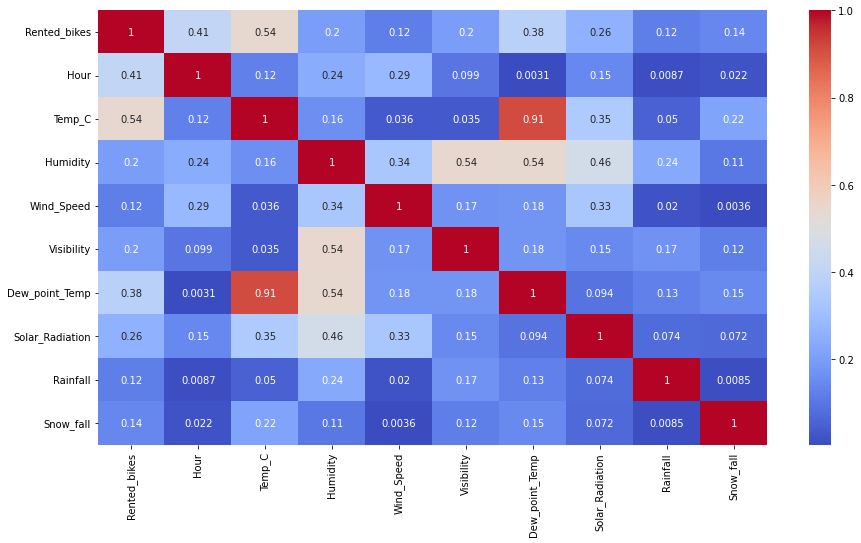

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sb.heatmap(abs(correlation), annot=True, cmap='coolwarm')

the above heatmap shows correlationship between each and every column

In [ ]:
### removing multicollear
dataset['Temp_c'] = 0.7*dataset['Temp_C'] + 0.3*dataset['Dew_point_Temp']

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ["Temp_C","Dew_point_Temp"]]])

,variables,VIF
0,Rented_bikes,4.010608
1,Hour,4.701825
2,Humidity,5.231409
3,Wind_Speed,4.659822
4,Visibility,4.935766
5,Solar_Radiation,2.133670
6,Rainfall,1.103935
7,Snow_fall,1.119102
8,Temp_c,3.447137


from the above data having collinear between Temperature and Dowe_point_temperature so this points have been removed and replaced with weights based temp_c 

In [ ]:
dataset.drop(columns={"Temp_C","Dew_point_Temp"},axis=1,inplace=True)

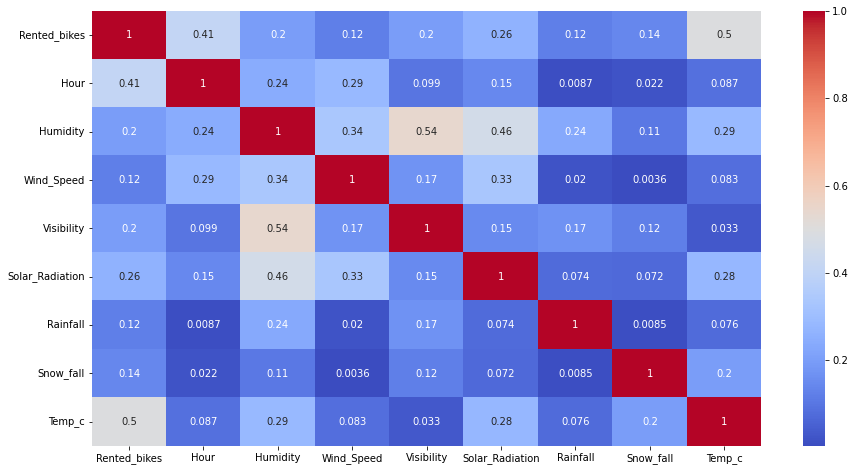

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sb.heatmap(abs(correlation), annot=True, cmap='coolwarm')

correlation figure after removing multicolinear variables 

In [ ]:
# droping some unimportant columns
dataset.drop(columns={"Date"},axis=1,inplace=True)

In [ ]:
dataset.head(1)

,Rented_bikes,Hour,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snow_fall,Seasons,Holiday,Functioning Day,Temp_c
0,254,0,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,-8.92


**ONE HOT ENCODING**

In [ ]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
dataset['Holiday']= le.fit_transform(dataset['Holiday']) 

dataset['Seasons']= le.fit_transform(dataset['Seasons'])

In [ ]:
one_hot_encoder=["Holiday","Seasons"]

In [ ]:
for col in one_hot_encoder[:]:
    counts = dataset[col].value_counts()
    print(counts)

1    8328
0     432
Name: Holiday, dtype: int64
1    2208
2    2208
0    2184
3    2160
Name: Seasons, dtype: int64


In [ ]:
dataset['Working_day'] = dataset['Functioning Day'].apply(lambda x : 1 if x == "Yes" else 0)

In [ ]:
dataset["Working_day"].value_counts()

1    8465
0     295
Name: Working_day, dtype: int64

In [ ]:
dataset.drop(columns={"Functioning Day"},axis=1,inplace=True)

In [ ]:
dataset.head()

,Rented_bikes,Hour,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snow_fall,Seasons,Holiday,Temp_c,Working_day
0,254,0,37,2.2,2000,0.0,0.0,0.0,3,1,-8.92,1
1,204,1,38,0.8,2000,0.0,0.0,0.0,3,1,-9.13,1
2,173,2,39,1.0,2000,0.0,0.0,0.0,3,1,-9.51,1
3,107,3,40,0.9,2000,0.0,0.0,0.0,3,1,-9.62,1
4,78,4,36,2.3,2000,0.0,0.0,0.0,3,1,-9.78,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import normalize

In [ ]:
#creating depedent_variable and independent_variable

dependent_variable=['Rented_bikes']

independent_varibale=["Hour",	"Humidity",	"Wind_Speed",	"Visibility",	"Solar_Radiation",	"Rainfall",	"Snow_fall",	"Seasons",	"Holiday",	"Temp_c" ,	"Working_day"]

In [ ]:
y=dataset[dependent_variable].values
X=dataset[independent_varibale].values

In [ ]:
# preprocessing our data using minimmaxscaler, and normalized
# Sclaing

X= scaler.fit_transform(X)
# Normalize
X= normalize(X)

In [ ]:
y

array([[254],
       [204],
       [173],
       ...,
       [694],
       [712],
       [584]])

In [ ]:
X

array([[-0.52988656, -0.33250433,  0.14623279, ...,  0.07264402,
        -0.50741208,  0.05954234],
       [-0.48177657, -0.31550825, -0.28349005, ...,  0.07233878,
        -0.51081799,  0.05929215],
       [-0.45257617, -0.31138783, -0.23069276, ...,  0.07510743,
        -0.54077335,  0.06156146],
       ...,
       [ 0.46561412, -0.32035838, -0.46652204, ...,  0.07727115,
        -0.32085545,  0.06333494],
       [ 0.56149437, -0.3131741 , -0.25895363, ...,  0.08430841,
        -0.3599117 ,  0.06910301],
       [ 0.61077542, -0.27492591, -0.15075159, ...,  0.08373336,
        -0.35715155,  0.06863167]])

In [ ]:
from sklearn.model_selection import train_test_split
import math

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 17)

In [ ]:
print(X.shape)
print(y.shape)

(8760, 11)
(8760, 1)


**Implementing Linear_regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  
  

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

array([616.39182888])

In [ ]:
regressor.coef_

array([[ 549.07816237, -475.64565139,   45.48604931,   22.56165154,
         -88.6270335 , -830.06945156, -214.82285021, -316.87960538,
         112.44965857,  937.5521883 ,  830.77064073]])

In [ ]:
# Validating Assumptions
y_train_pred_lr = regressor.predict(X_train)
y_test_pred_lr = regressor.predict(X_test)

In [ ]:
print(y_test_pred_lr)

[[1350.42935697]
 [ 442.86972768]
 [1422.42279894]
 ...
 [ 902.65168514]
 [ 978.22304847]
 [ 694.89548554]]


In [ ]:
# actual y values
print(y_test)

[[1284]
 [ 165]
 [1474]
 ...
 [ 678]
 [1168]
 [ 586]]


In [ ]:
# Evaluation of training Data
print_metrics(y_train, y_train_pred_lr)


#Find R-squared value
r2 = r2_score(y_train, y_train_pred_lr)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_train, y_train_pred_lr))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 165653.46610466568
RMSE is 407.0054865780874
MAE is 303.1659194342062
r2:0.5996094692464726
Adj_r2:0.5989799243867973


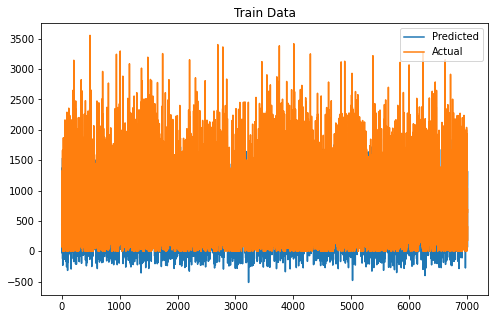

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_train_pred_lr)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

From the figure shows that  training data prediction and acutal values comparision it's accuracy is approx 60%

In [ ]:
# Test dataset metrics
print_metrics(y_test, y_test_pred_lr)

# evaluating test data
 #Find R-squared value
r2 = r2_score(y_test, y_test_pred_lr)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_test_pred_lr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 162782.8485027821
RMSE is 403.4635652729774
MAE is 297.2204328597943
r2:0.6166171833670027
Adj_r2:0.6141934988940354


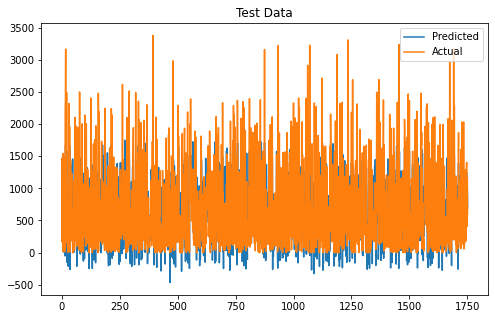

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Test Data')
plt.plot(y_test_pred_lr)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

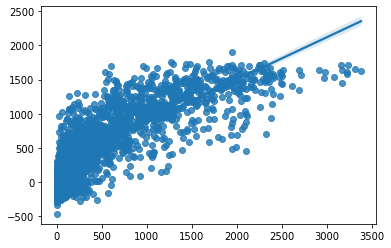

In [ ]:
sb.regplot(y_test,y_test_pred_lr)

From the above two figures shows that testing data  predicted achived values and actual values comparision  ,it's accuracy approx 61%

**implementing regularization using Lasso and Ridge**

**Implementing Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
### Grid search cv on lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
lasso_regressor.score(X_train,y_train)

-165653.4870947773

In [ ]:
# Validating Assumptions
y_train_pred_lasso = lasso_regressor.predict(X_train)
y_test_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
print(y_test_pred_lasso)

[1350.40446035  442.69024509 1422.37289185 ...  902.64221108  978.29044049
  694.79641537]


In [ ]:
# actual vlues of y
print(y_test)

[[1284]
 [ 165]
 [1474]
 ...
 [ 678]
 [1168]
 [ 586]]


In [ ]:
# Evaluation of training Data
print_metrics(y_train, y_train_pred_lasso)

# Evaluating train data
#Find R-squared value
r2 = r2_score(y_train, y_train_pred_lasso)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_train, y_train_pred_lasso))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 165653.4870947773
RMSE is 407.00551236411684
MAE is 303.15896777119866
r2:0.5996094185125995
Adj_r2:0.598979873573154


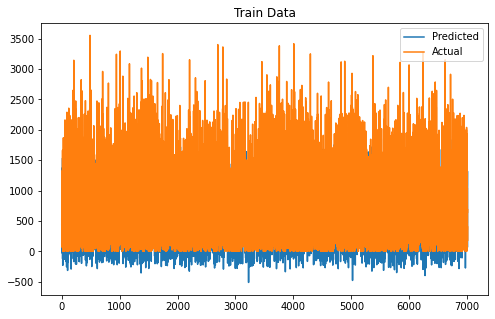

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_train_pred_lasso)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()


From the figure shows that training data prediction and acutal values comparision it's accuracy is approx 60%

In [ ]:
# Evaluating test data
print_metrics(y_test, y_test_pred_lasso)

#Find R-squared value
r2 = r2_score(y_test, y_test_pred_lasso)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_test_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 162783.67950879227
RMSE is 403.46459511187874
MAE is 297.21492882336497
r2:0.6166152261987399
Adj_r2:0.6141915293528698


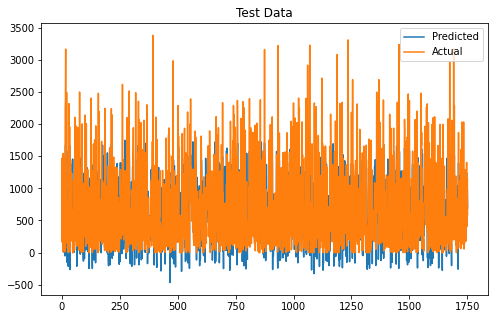

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Test Data')
plt.plot(y_test_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

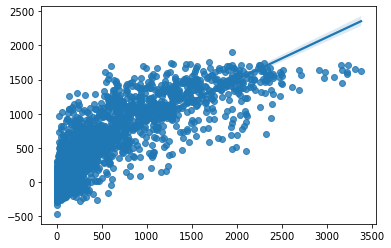

In [ ]:
sb.regplot(y_test,y_test_pred_lasso)

From the above two figures shows that testing data predicted achived values and actual values comparision ,it's accuracy approx 61%

**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Grid cv on RIDGE
ridge=Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
ridge_regressor.score(X_train,y_train)

-165655.18454031108

In [ ]:
# Validating Assumptions
y_train_pred_ridge = ridge_regressor.predict(X_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)

print(y_test_pred_ridge)

[[1349.91319581]
 [ 442.72180656]
 [1421.82864569]
 ...
 [ 902.88956774]
 [ 977.88816472]
 [ 694.32140391]]


In [ ]:
# actual vlues of y
print(y_test)

[[1284]
 [ 165]
 [1474]
 ...
 [ 678]
 [1168]
 [ 586]]


In [ ]:
# Evaluation of training Data
print_metrics(y_train, y_train_pred_ridge)

#Find R-squared value
r2 = r2_score(y_train, y_train_pred_ridge)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_train, y_train_pred_ridge))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 165655.18454031108
RMSE is 407.00759764445564
MAE is 303.07233461074304
r2:0.5996053157242053
Adj_r2:0.5989757643338345


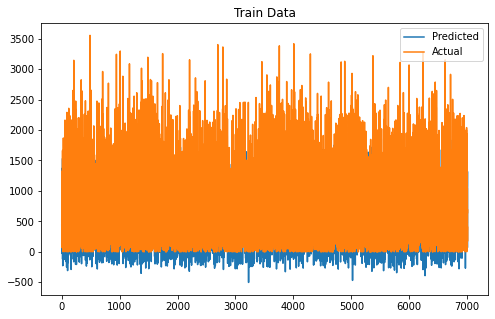

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_train_pred_ridge)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()


From the figure shows that training data prediction and acutal values comparision it's accuracy is approx 60%

In [ ]:

# Evaluating test data
print_metrics(y_test, y_test_pred_ridge)
#Find R-squared value
r2 = r2_score(y_test, y_test_pred_ridge)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_test_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 162780.2389090315
RMSE is 403.46033127066096
MAE is 297.1346783094778
r2:0.6166233294285293
Adj_r2:0.6141996838099739


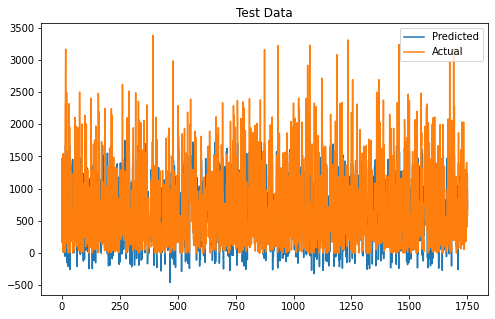

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Test Data')
plt.plot(y_test_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

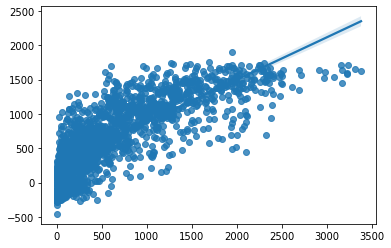

In [ ]:
sb.regplot(y_test,y_test_pred_ridge)

From the above two figures shows that testing data predicted achived values and actual values comparision ,it's accuracy approx 61%

**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
parameters = {'ccp_alpha':[0.01,0.1,1,10,100],
              'max_depth': [4, 6, 8,10],
            'min_samples_leaf': [40, 50],
            'min_samples_split': [ 50, 100, 150]}

rf_grid =GridSearchCV(rf,param_grid=parameters,cv=3)

rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150]})

In [ ]:
rf_grid.best_params_

{'ccp_alpha': 1,
 'max_depth': 10,
 'min_samples_leaf': 40,
 'min_samples_split': 50}

In [ ]:
rf_optimal_model=rf_grid.best_estimator_

In [ ]:
rf_optimal_model.score(X_test,y_test)

0.7903621462322247

In [ ]:
# Validating Assumptions
y_train_pred_rf = rf_optimal_model.predict(X_train)
y_test_pred_rf = rf_optimal_model.predict(X_test)

print(y_test_pred_rf)

[855.79745433 247.29865343 912.25258354 ... 829.8576851  986.20632585
 455.90323775]


In [ ]:
# Evaluation of training Data
print_metrics(y_train, y_train_pred_rf)

#Find R-squared value
r2 = r2_score(y_train, y_train_pred_rf)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_train, y_train_pred_rf))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 76256.1408418742
RMSE is 276.1451445198235
MAE is 184.17936156846693
r2:0.815686098076557
Adj_r2:0.8153962963439729


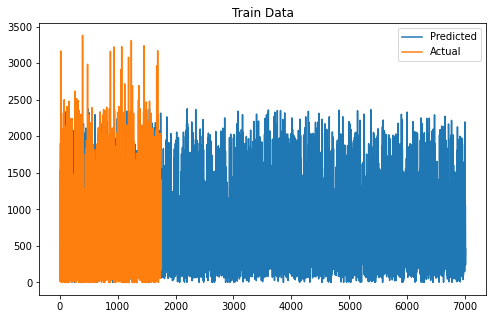

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Train Data")
plt.plot(y_train_pred_rf)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

From the figure shows that training data prediction and acutal values comparision it's accuracy is approx 82%

In [ ]:
# Evaluating test data

print_metrics(y_test, y_test_pred_rf)

#Find R-squared value
r2 = r2_score(y_test, y_test_pred_rf)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_test_pred_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 89011.41498732216
RMSE is 298.34780875233884
MAE is 199.3975211170439
r2:0.7903621462322247
Adj_r2:0.7890368494555318


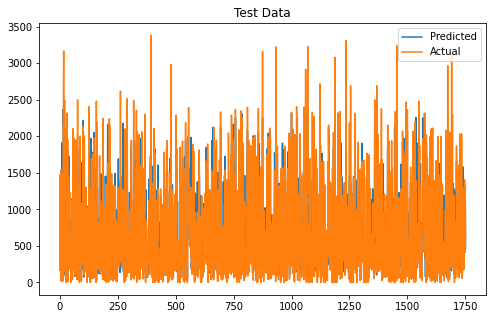

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Test Data")
plt.plot(y_test_pred_rf)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

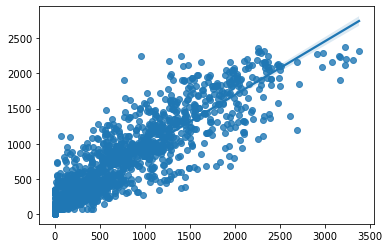

In [ ]:
sb.regplot(y_test,y_test_pred_rf)

From the above two figures shows that testing data predicted achived values and actual values comparision ,it's accuracy approx 79%

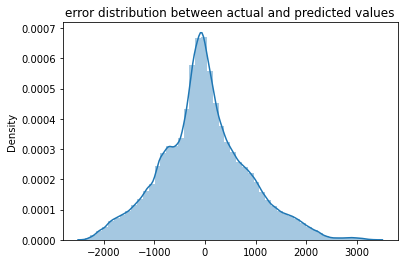

In [ ]:
sb.distplot(y_test - y_test_pred_rf ).set_title("error distribution between actual and predicted values")
plt.show()

**Gradient boosting regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Number of trees
n_estimators = [100,120]

# Maximum depth of trees
max_depth = [5,8,10]

# Minimum number of samples required to split a node
min_samples_split = [50,80]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]


# HYperparameter Grid
params = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
 gbr= GradientBoostingRegressor()

gbr_grid =GridSearchCV(gbr,param_grid=params, verbose=1,cv=2,scoring='r2')

gbr_grid.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [5, 8, 10], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 80],
                         'n_estimators': [100, 120]},
             scoring='r2', verbose=1)

In [ ]:
gbr_grid.score(X_train,y_train)


0.9359291036639233

In [ ]:
gbr_grid.score(X_test,y_test)

0.8576497527824207

In [ ]:
gbr_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 40,
 'min_samples_split': 80,
 'n_estimators': 120}

In [ ]:

gbr_grid.best_estimator_

GradientBoostingRegressor(max_depth=10, min_samples_leaf=40,
                          min_samples_split=80, n_estimators=120)

In [ ]:
gbr_optimal_model = gbr_grid.best_estimator_

In [ ]:
# Validating Assumptions
y_train_pred_gbr = gbr_optimal_model.predict(X_train)
y_test_pred_gbr = gbr_optimal_model.predict(X_test)

print(y_test_pred_gbr)

[1002.67049202  195.15174318  974.12208118 ...  714.26244963 1217.71133877
  471.97454545]


In [ ]:
# Evaluation of training Data
print_metrics(y_train, y_train_pred_gbr)

#Find R-squared value
r2 = r2_score(y_train, y_train_pred_gbr)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_train, y_train_pred_gbr))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 26508.03462941366
RMSE is 162.81288225878708
MAE is 105.84483947491167
r2:0.9359291036639233
Adj_r2:0.9358283632608793


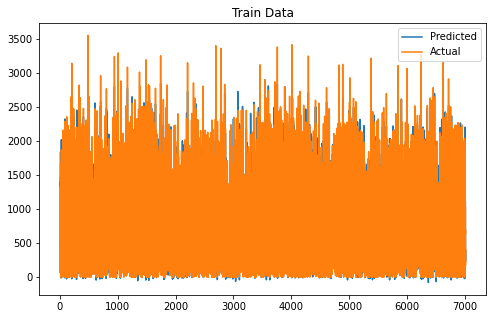

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_train_pred_gbr)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

From the figure shows that training data prediction and acutal values comparision it's accuracy is approx 94%

In [ ]:
# Evaluating test data
print_metrics(y_test, y_test_pred_gbr)

#Find R-squared value
r2 = r2_score(y_test, y_test_pred_gbr)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_test_pred_gbr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 60441.35971105592
RMSE is 245.84824528773012
MAE is 158.97705536051728
r2:0.8576497527824207
Adj_r2:0.8567498374264475


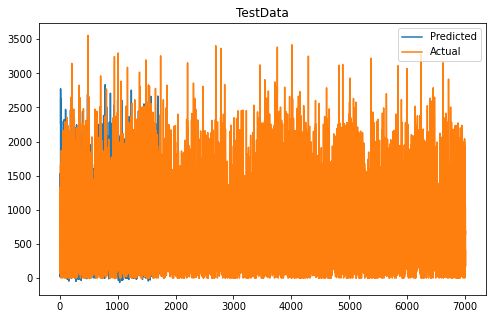

In [ ]:
plt.figure(figsize=(8,5))
plt.title('TestData')
plt.plot(y_test_pred_gbr)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

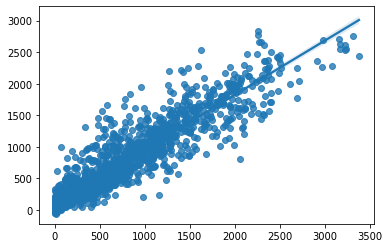

In [ ]:
sb.regplot(y_test,y_test_pred_gbr)

From the above two figures shows that testing data predicted achived values and actual values comparision ,it's accuracy approx 86%

 **XG BOOST**

In [ ]:
import xgboost as xgb

In [ ]:
xgb=xgb.XGBRegressor( colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=8, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective="reg:linear", random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [ ]:
xgb.fit(X_train,y_train)

[07:14:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=6, min_child_weight=8)

In [ ]:
xgb.score(X_train,y_train)

0.926997140265064

In [ ]:
xgb.score(X_test,y_test)

0.8539647071416981

In [ ]:

# Validating Assumptions
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)

print(y_train_pred_xgb)

[513.8406  128.3854  115.17376 ... 744.4473  219.86974 384.24625]


In [ ]:
# Evaluation of training Data
print_metrics(y_train, y_train_pred_xgb)

#Find R-squared value
r2 = r2_score(y_train, y_train_pred_xgb)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_train, y_train_pred_xgb))*((X_train.shape[0]-1)/(X_train.shape[0]-X_test.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 30203.453433041366
RMSE is 173.79140782283042
MAE is 116.30846566745595
r2:0.926997140265064
Adj_r2:0.9268823558944116


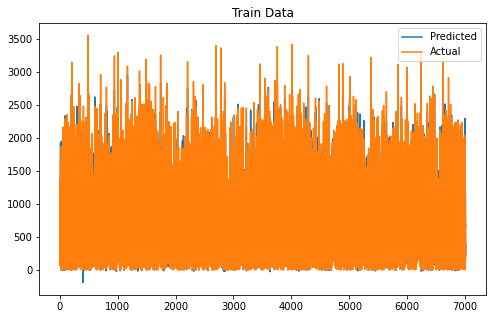

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_train_pred_xgb)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

From the figure shows that training data prediction and acutal values comparision it's accuracy is approx 93%

In [ ]:
# Evaluation of test Data
print_metrics(y_test, y_test_pred_xgb)


#Find R-squared value
r2 = r2_score(y_test, y_test_pred_xgb)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_test_pred_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 62006.01571605839
RMSE is 249.01007151530717
MAE is 163.01598021980018
r2:0.8539647071416981
Adj_r2:0.8530414955201802


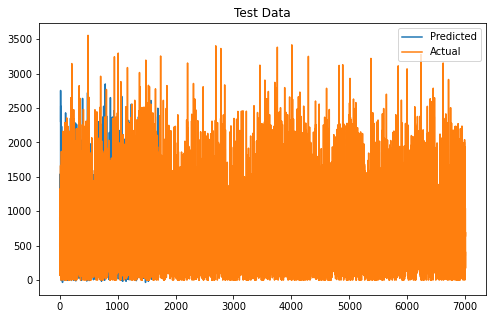

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Test Data')
plt.plot(y_test_pred_xgb)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

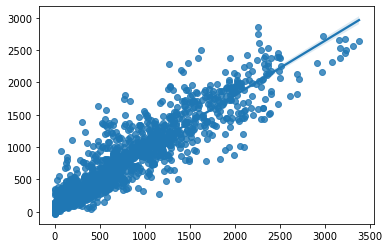

In [ ]:
sb.regplot(y_test,y_test_pred_xgb)

From the above two figures shows that testing data predicted achived values and actual values comparision ,it's accuracy approx 86%


**Model Summary For Train data**

In [ ]:
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"MODEL_NAME", "Train MSE", "Train RMSE","Train MAE",'Train R^2','Train Adjusted R^2'])
train.add_row(['1','Linear Regression','165653.46610466568','407.0054865780874',' 303.1659194342062',"0.5996094692464726","0.5989799243867973"])
train.add_row(['2','Lasso Regression','165653.4870947773','407.00551236411684','303.15896777119866',"0.5996094185125995","0.598979873573154"])
train.add_row(['3','Ridge Regression ',' 165655.18454031108','407.00759764445564','303.07233461074304',"0.5996053157242053","0.5989757643338345"])
train.add_row(['4','Random forest','76247.44387327056',' 276.12939697408274','184.22067011006627',"0.8157071189700948",'0.8154173502892302'])
train.add_row(['5','Gradient Boost Regressor','26508.03462941366','162.81288225878708','105.8448394749117',"0.9359291036639233","0.9358283632608793"])
train.add_row(['6','XG boost','30203.453433041366',' 173.79140782283042','116.30846566745595',"0.926997140265064",'0.9268823558944116'])
print(train)

+-------+--------------------------+---------------------+---------------------+--------------------+--------------------+--------------------+
| SL NO |        MODEL_NAME        |      Train MSE      |      Train RMSE     |     Train MAE      |     Train R^2      | Train Adjusted R^2 |
+-------+--------------------------+---------------------+---------------------+--------------------+--------------------+--------------------+
|   1   |    Linear Regression     |  165653.46610466568 |  407.0054865780874  |  303.1659194342062 | 0.5996094692464726 | 0.5989799243867973 |
|   2   |     Lasso Regression     |  165653.4870947773  |  407.00551236411684 | 303.15896777119866 | 0.5996094185125995 | 0.598979873573154  |
|   3   |    Ridge Regression      |  165655.18454031108 |  407.00759764445564 | 303.07233461074304 | 0.5996053157242053 | 0.5989757643338345 |
|   4   |      Random forest       |  76247.44387327056  |  276.12939697408274 | 184.22067011006627 | 0.8157071189700948 | 0.81541735028

**Model Summary for TEST data**

In [ ]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "Test MSE", "Test RMSE","Test MAE",'Test R^2','Test Adjusted R^2'])
test.add_row(['1','Linear Regression','162782.8485027821','403.4635652729774','297.2204328597943 ',"0.6166171833670027","0.6141934988940354"])
test.add_row(['2','Lasso Regression','162783.67950879227','403.46459511187874','297.21492882336497','0.6166152261987399',"0.6141915293528698"])
test.add_row(['3','Ridge Regression ','162780.2389090315',' 403.46033127066096','297.1346783094778',"0.6166233294285293","0.6141996838099739"])
test.add_row(['4','Random Forest','89386.93284085907','298.97647539707714','199.81704324076026',"0.7894777343073252","0.7881468464207623"])
test.add_row(['5','Gradient Boost Regressor',' 60421.102102259145','245.80704241794854','158.98112712499352',"0.857697463085995","0.8567978493468835"])
test.add_row(['6','XG boost','62006.01571605839','249.01007151530717','163.01598021980018','0.8539647071416981',"0.8530414955201802"])


print(test)

+-------+--------------------------+---------------------+---------------------+--------------------+--------------------+--------------------+
| SL NO |        MODEL_NAME        |       Test MSE      |      Test RMSE      |      Test MAE      |      Test R^2      | Test Adjusted R^2  |
+-------+--------------------------+---------------------+---------------------+--------------------+--------------------+--------------------+
|   1   |    Linear Regression     |  162782.8485027821  |  403.4635652729774  | 297.2204328597943  | 0.6166171833670027 | 0.6141934988940354 |
|   2   |     Lasso Regression     |  162783.67950879227 |  403.46459511187874 | 297.21492882336497 | 0.6166152261987399 | 0.6141915293528698 |
|   3   |    Ridge Regression      |  162780.2389090315  |  403.46033127066096 | 297.1346783094778  | 0.6166233294285293 | 0.6141996838099739 |
|   4   |      Random Forest       |  89386.93284085907  |  298.97647539707714 | 199.81704324076026 | 0.7894777343073252 | 0.78814684642

**CONCLUSION**
Conclusion We used diffent type of regression algorithms to train our model like, Linear Regression, Regularized linear regression (Ridge and Lasso),Random Forest Regressor, Gradient boosting Regressor, default XGboost regresssor.out of them Gradient Boost Regression performed best well.
 

MSE is approx  60421,

RMSE IS approx 245,

MAE is approx 159,

R2 is approx 86%,

Adj R2 approx 86%
